In [1]:
import pyift as ift
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

ModuleNotFoundError: No module named 'pyift'

In [2]:
def show(img, dpi=125):
    fig, ax=plt.subplots(dpi=dpi)
    ax.imshow(img)

    
def imageOverlay(original, label):
    A = ift.Circular(1.0)
    tmp = ift.CopyImage(original)
    cmap = ift.CreateColorTable(ift.MaximumValue(label) + 1)
    ift.DrawLabels(tmp, label, cmap, A, True, 0.2)
    show(tmp.ToPlot())
    

def unsupTrainOPF(Z, kmax):
    mst = ift.CreateMST(Z)
    graph = ift.MSTtoKnnGraph(mst, kmax)
    ift.UnsupTrain(graph, ift.NormalizedCutPtr())
    return graph

In [3]:
# ATTENTION WITHOUT CORRECT PATHS IT WON'T WORK
img = ift.ReadImageByExt("./flowers.png") # CHANGE THIS PATH 
seeds = ift.ReadSeeds("./flowers-seeds.txt", img) # ALSO THIS ONE
n_suppxl = 500
A = ift.Circular(1.0)

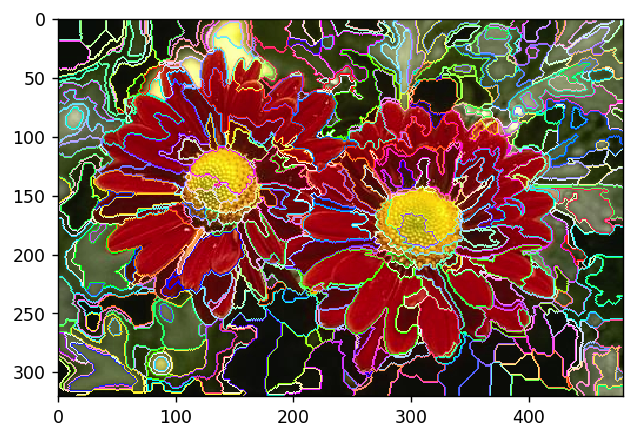

In [4]:
suppxl = ift.Extract_ISF_MIX_ROOT_Superpixels(img, n_suppxl, 0.5, 12, 10, 2)
border = ift.BorderImage(suppxl, False)
imageOverlay(img, border)

In [5]:
feat = ift.ExtractImageFeatures(img, suppxl, A, False)
Z = ift.MImageToDataSet(feat, suppxl)
Ztmp = ift.CopyDataSet(Z, True)

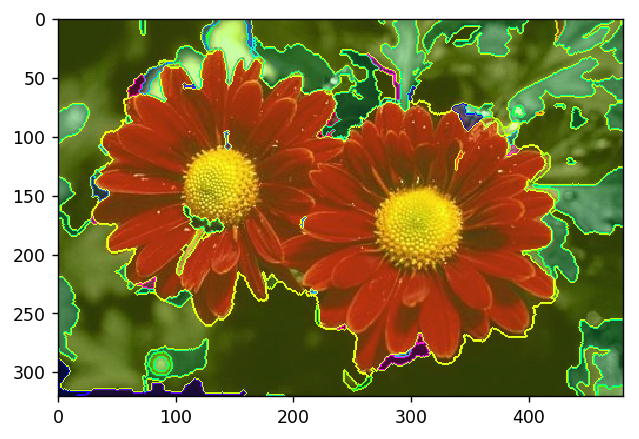

In [6]:
unsupTrainOPF(Z, 200)
ift.SetStatus(Z, ift.IFT_TRAIN)
clusters = ift.DataSetToLabelImage(Z, suppxl, False, ift.IFT_GROUP)
imageOverlay(img, clusters)

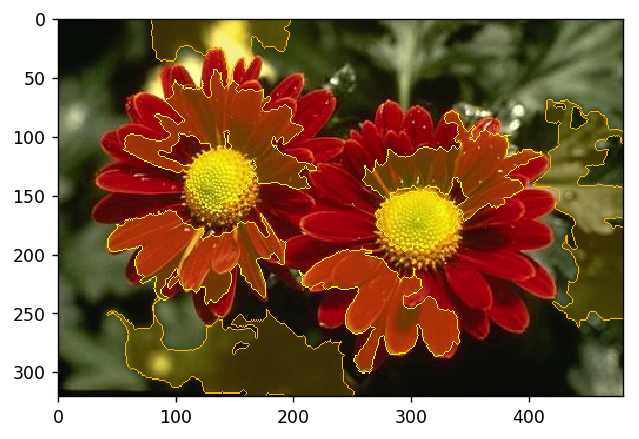

In [7]:
ift.SetStatus(Z, ift.IFT_TRAIN)
ift.LabelDataSetFromSeeds(Z, seeds, suppxl)
labels = ift.DataSetToLabelImage(Z, suppxl, False, ift.IFT_CLASS)
imageOverlay(img, labels)

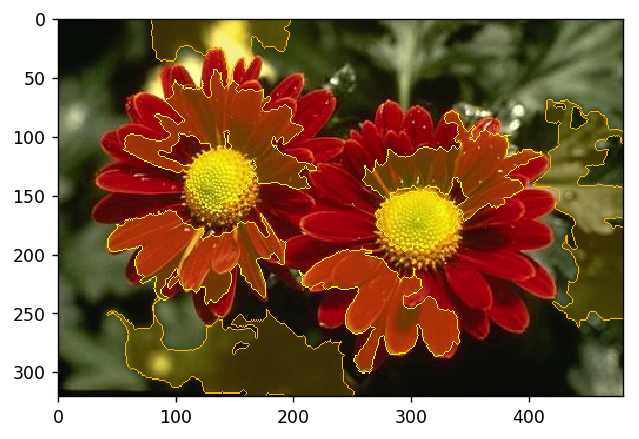

In [8]:
selectSeeds = ift.SelectSeedsForEnhancement(seeds, clusters, 0.6)
ift.SetStatus(Ztmp, ift.IFT_TRAIN)
ift.LabelDataSetFromSeeds(Ztmp, selectSeeds, suppxl)
labels = ift.DataSetToLabelImage(Ztmp, suppxl, False, ift.IFT_CLASS)
imageOverlay(img, labels)

In [9]:
# Ztmp = ift.CopyDataSet(Z, True)
# ift.SelectDataSetClassesByCluster(Ztmp, 0.9)
# Z.nclasses

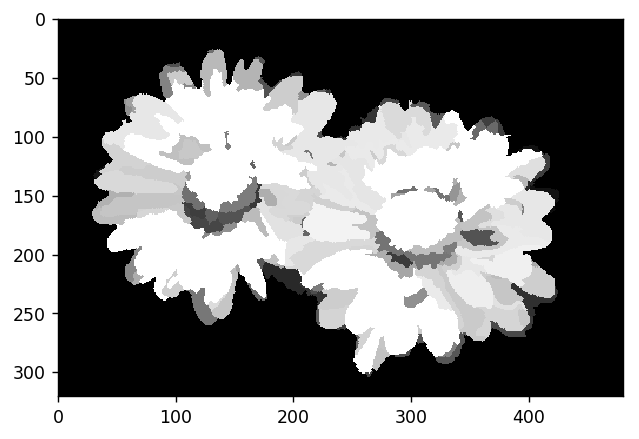

In [10]:
cplGraph = ift.SemiSupTrain(Z)
ift.SetStatus(Z, ift.IFT_TEST)
ift.ClassifyWithCertaintyValues(cplGraph, Z)
objmap = ift.DataSetObjectMap(Z, suppxl, 255, 2)
show(objmap.ToPlot())

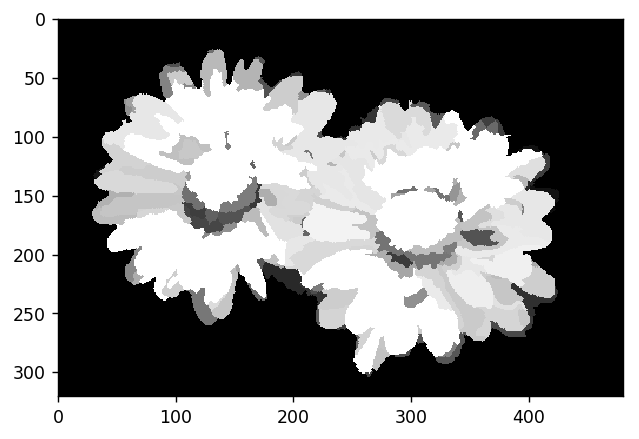

In [11]:
cplGraph = ift.SemiSupTrain(Ztmp)
ift.SetStatus(Ztmp, ift.IFT_TEST)
ift.ClassifyWithCertaintyValues(cplGraph, Ztmp)
objmap = ift.DataSetObjectMap(Ztmp, suppxl, 255, 2)
show(objmap.ToPlot())

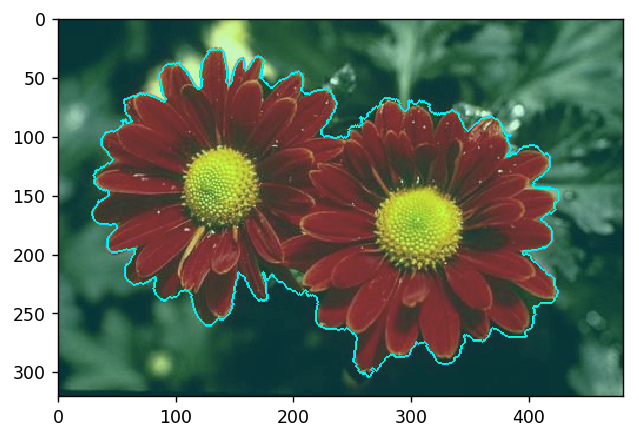

In [12]:
# cplGraph = ift.SemiSupTrain(Z)
# ift.SetStatus(Z, ift.IFT_TEST)
# ift.Classify(cplGraph, Z)
segm = ift.DataSetToLabelImage(Z, suppxl, False, ift.IFT_LABEL)
imageOverlay(img, segm)

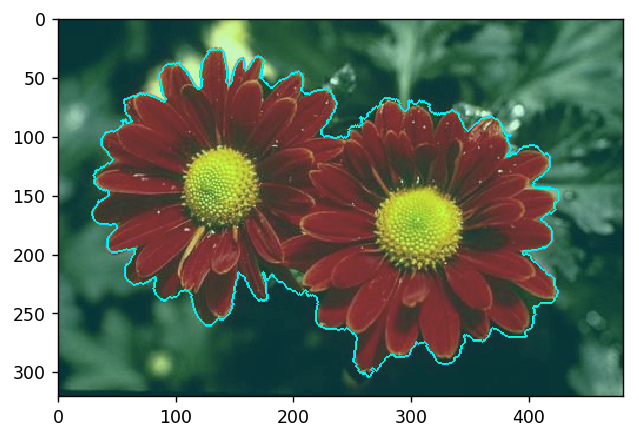

In [13]:
# cplGraph = ift.SemiSupTrain(Ztmp)
# ift.SetStatus(Ztmp, ift.IFT_TEST)
# ift.Classify(cplGraph, Ztmp)
segm = ift.DataSetToLabelImage(Ztmp, suppxl, False, ift.IFT_LABEL)
imageOverlay(img, segm)

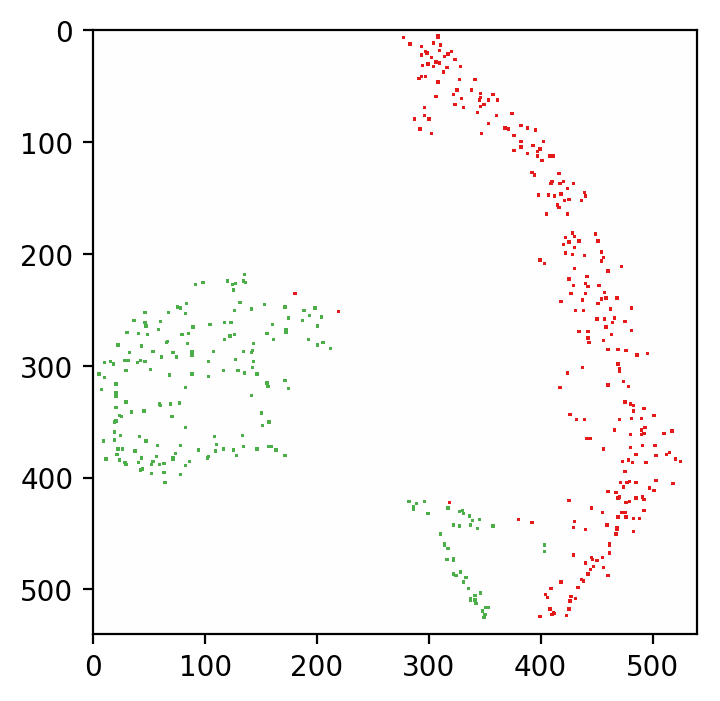

In [14]:
Z2d = ift.DimReductionByTSNE(Z, 2, 40, 1000)
plot = ift.Draw2DFeatureSpace(Z2d, ift.IFT_LABEL, ift.IFT_ALL)
show(plot.ToPlot(), dpi=200)

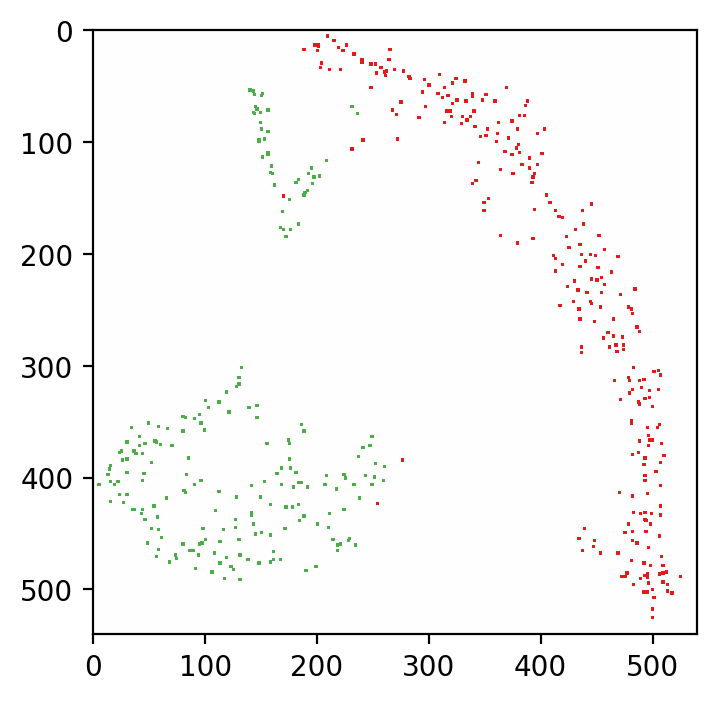

In [15]:
Z2d = ift.DimReductionByTSNE(Ztmp, 2, 40, 1000)
plot = ift.Draw2DFeatureSpace(Z2d, ift.IFT_LABEL, ift.IFT_ALL)
show(plot.ToPlot(), dpi=200)

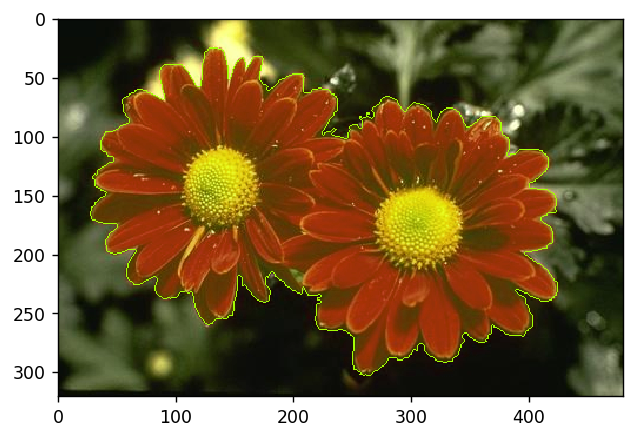

In [16]:
mimg = ift.ImageToMImage(img, ift.LABNorm_CSPACE)
dyn = ift.DynamicSetMinRootPolicy(mimg, A, selectSeeds, 1, True)
imageOverlay(img, dyn)

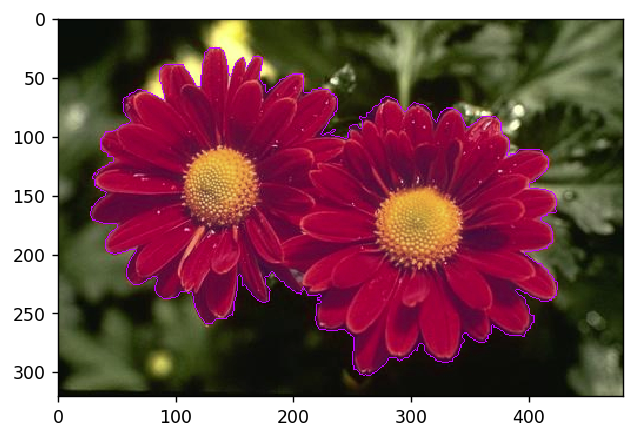

In [17]:
mimg = ift.ImageToMImage(img, ift.LABNorm_CSPACE)
dyn = ift.DynamicSetMinRootPolicy(mimg, A, seeds, 1, True)
imageOverlay(img, dyn)